In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

## Load previously merged and downsampled data 

In [7]:
df = pd.read_csv (r'C:\Users\conal\Desktop\MCM\Practicum\data\ETH,gas,usage merged 11-26 to 01-26.csv', header=0)
df['datetime'] = pd.to_datetime(df['datetime'], format = '%Y-%m-%d %H:%M')
df = df.sort_values(by='datetime',ascending=False)
df.head()

,datetime,gas_limit,gas_used,timestamp_y,Open,avg_gas_price,max_gas_price,min_gas_price,block_utilisation
1423,2021-11-26 23:43:00,2.995603e+07,1.707354e+07,1637970180,4033.45,134.790750,2309.710750,111.143750,0.569953
1422,2021-11-26 23:42:00,2.998044e+07,1.086543e+07,1637970120,4048.31,143.328667,343.468667,128.649167,0.362417
1421,2021-11-26 23:41:00,2.998528e+07,1.232873e+07,1637970060,4057.11,158.269000,642.820000,137.442500,0.411159
1420,2021-11-26 23:40:00,2.999020e+07,1.412373e+07,1637970000,4059.68,149.285667,474.663667,137.696667,0.470945
1419,2021-11-26 23:39:00,2.999997e+07,2.164324e+07,1637969940,4073.14,153.834333,3321.503667,133.070000,0.721442


Get mean and maximum timesteps between datapoints
Check for missing values, get shape of df

In [10]:
print('mean delta')
print(df.sort_values('datetime').datetime.diff().mean())

print('max delta')
print(df.sort_values('datetime').datetime.diff().max())

print(" \nCount total NaN at each column in a DataFrame : \n\n",
      df.isnull().sum())
df.shape

mean delta
0 days 00:01:00
max delta
0 days 00:01:00
 
Count total NaN at each column in a DataFrame : 

 datetime              0
gas_limit            14
gas_used             14
timestamp_y           0
Open                  0
avg_gas_price        14
max_gas_price        14
min_gas_price        14
block_utilisation    14
dtype: int64


(1424, 9)

We can see at a 1 minute samplig window, we have 14 1-minute intervals with no data, for gas price.

This corresponds to time periods where no block was mined

In [15]:
null_data = df[df.isnull().any(axis=1)]
null_data.head(30)

,datetime,gas_limit,gas_used,timestamp_y,Open,avg_gas_price,max_gas_price,min_gas_price,block_utilisation
1367,2021-11-26 22:47:00,NaN,NaN,1637966820,4084.01,NaN,NaN,NaN,NaN
1296,2021-11-26 21:36:00,NaN,NaN,1637962560,4108.81,NaN,NaN,NaN,NaN
1269,2021-11-26 21:09:00,NaN,NaN,1637960940,4118.72,NaN,NaN,NaN,NaN
1233,2021-11-26 20:33:00,NaN,NaN,1637958780,4091.43,NaN,NaN,NaN,NaN
1181,2021-11-26 19:41:00,NaN,NaN,1637955660,4081.46,NaN,NaN,NaN,NaN
1050,2021-11-26 17:30:00,NaN,NaN,1637947800,4080.80,NaN,NaN,NaN,NaN
1017,2021-11-26 16:57:00,NaN,NaN,1637945820,4078.71,NaN,NaN,NaN,NaN
879,2021-11-26 14:39:00,NaN,NaN,1637937540,4122.02,NaN,NaN,NaN,NaN
483,2021-11-26 08:03:00,NaN,NaN,1637913780,4325.86,NaN,NaN,NaN,NaN
179,2021-11-26 02:59:00,NaN,NaN,1637895540,4456.85,NaN,NaN,NaN,NaN


## Let check a 3 mintue windows

In [213]:
#Set index to timestamp, data type to float, set sampling window
df_resampled = df.set_index('block_timestamp')
df_resampled = df_resampled.squeeze()
df_resampled = df_resampled.astype('float')
df_resampled = df_resampled.resample('3T').mean()


Standard deviation is high, for all block gas prices, above the mean in case of max block gas price

In [215]:
df_resampled.describe(include='all')

,avg_gas_price,max_gas_price,min_gas_price
count,29760.000000,29760.000000,29760.000000
mean,122.913916,539.766693,110.093531
std,73.792696,904.444344,62.774504
min,33.061846,76.453188,27.760512
25%,83.134226,249.642187,73.821267
50%,109.537930,362.890659,98.333458
75%,143.919346,574.209449,130.582576
max,2212.466014,63167.398504,1439.891452


In [216]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29760 entries, 2021-11-26 00:00:00 to 2022-01-26 23:57:00
Freq: 3T
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   avg_gas_price  29760 non-null  float64
 1   max_gas_price  29760 non-null  float64
 2   min_gas_price  29760 non-null  float64
dtypes: float64(3)
memory usage: 1.9 MB


#### Null and non-null count matches; we have no missign values at the sampling rate 

# Lets plot the timeseries for visual analysis 

(0.0, 24000.0)

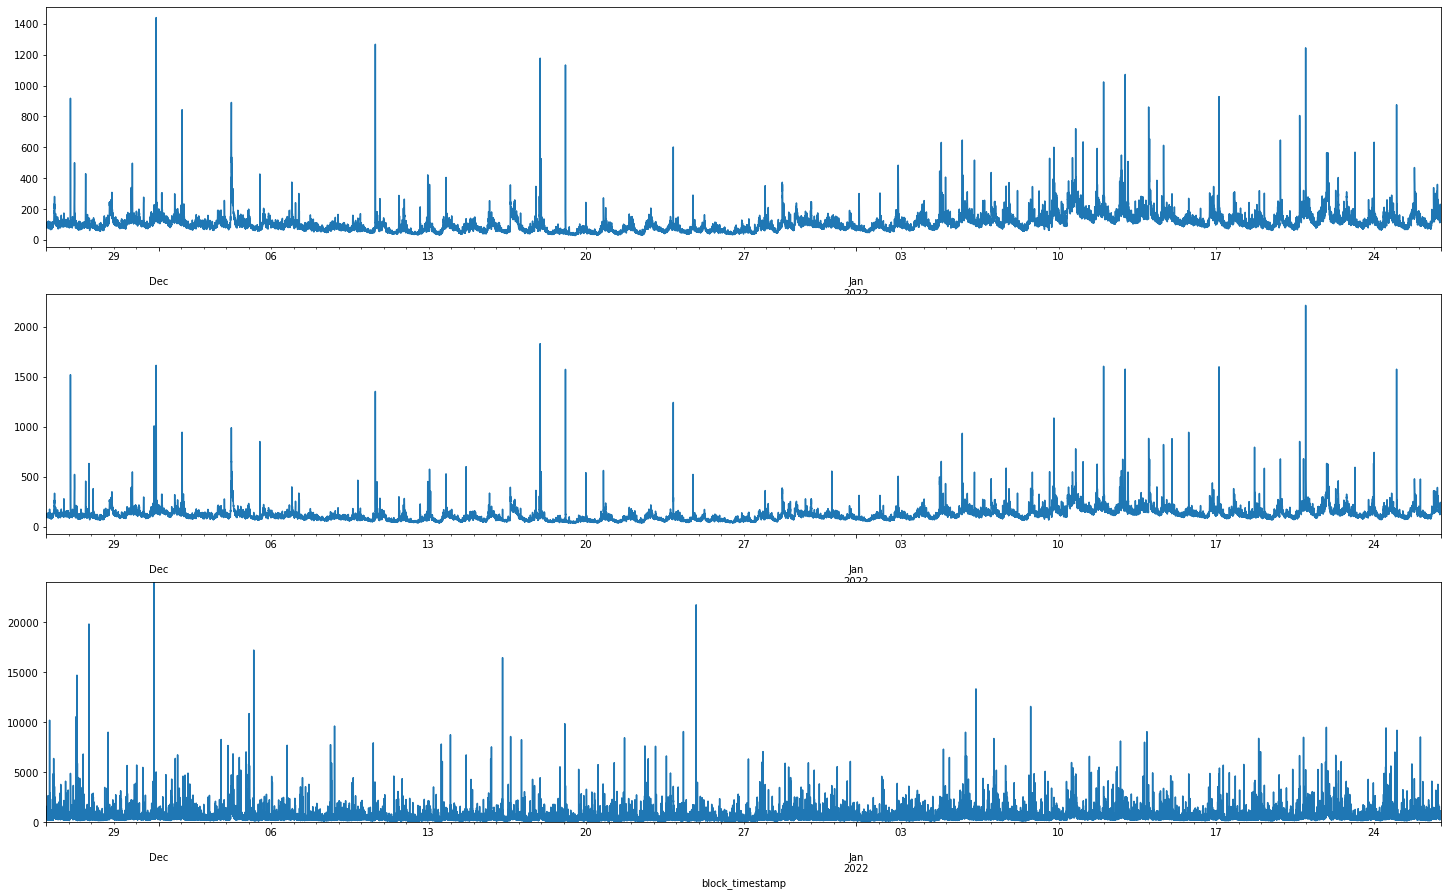

In [221]:
fig,ax = plt.subplots(3,1, figsize=(25, 15))
plt.subplot(3,1,1)
df_resampled['min_gas_price'].plot()
plt.subplot(3,1,2)
df_resampled['avg_gas_price'].plot()
plt.subplot(3,1,3)
df_resampled['max_gas_price'].plot()
plt.ylim([0,24000])


## First week of data

In [225]:
df_week = df_resampled.loc['2022-01-19':'2022-01-26']

In [227]:
df_week.describe(include='all')

,avg_gas_price,max_gas_price,min_gas_price
count,3840.000000,3840.000000,3840.000000
mean,151.684825,625.552039,137.589717
std,80.565162,694.596516,65.881054
min,67.441312,128.860597,61.240704
25%,108.024785,293.002103,98.119844
50%,133.217516,421.416404,121.927372
75%,172.775674,678.059975,158.287186
max,2212.466014,9484.851383,1243.802224


(0.0, 12000.0)

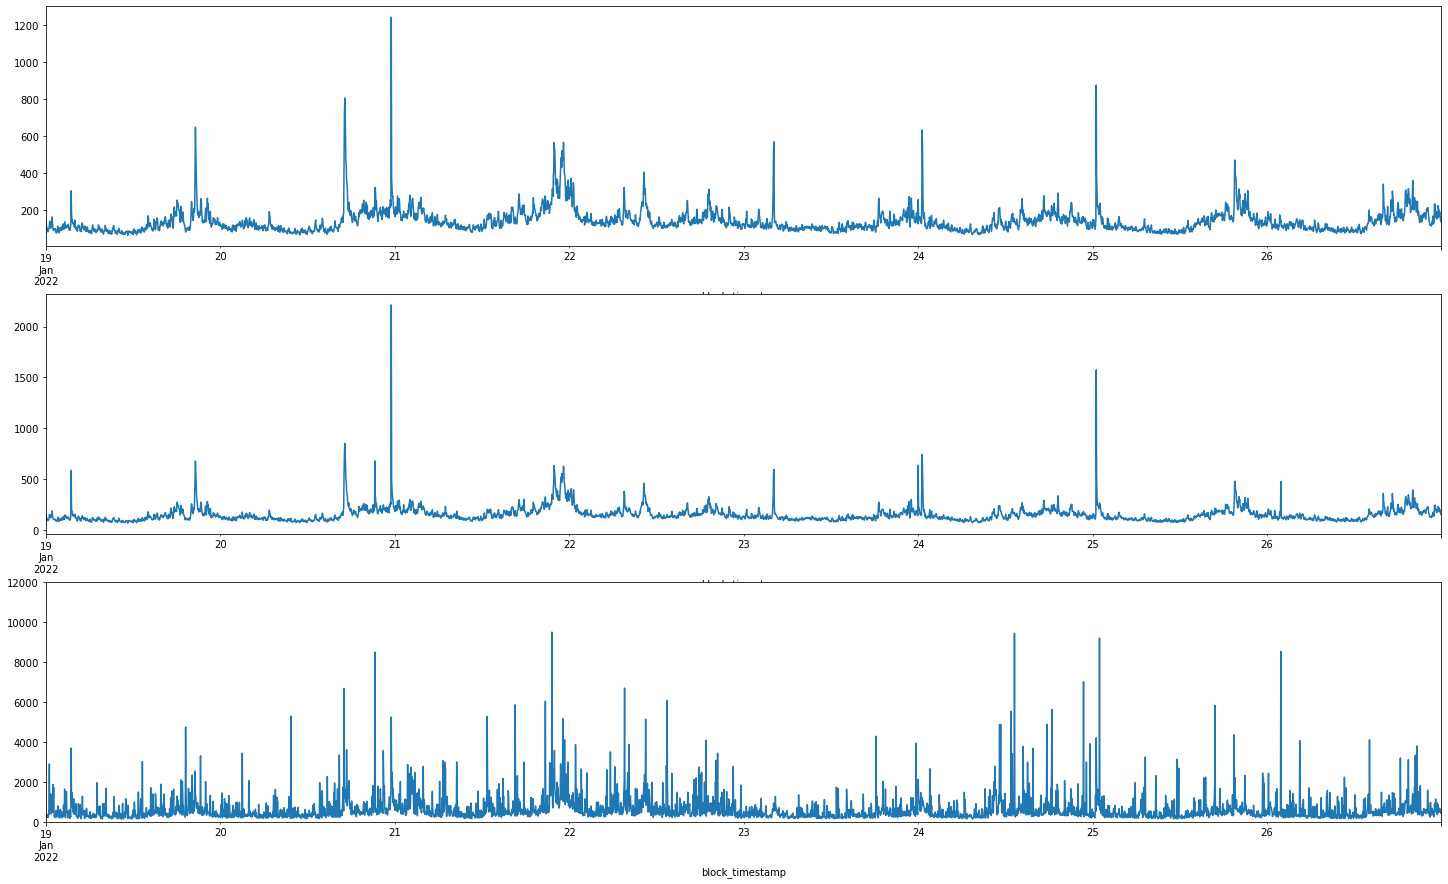

In [230]:
fig,ax = plt.subplots(3,1, figsize=(25, 15))
plt.subplot(3,1,1)
df_week['min_gas_price'].plot()
plt.subplot(3,1,2)
df_week['avg_gas_price'].plot()
plt.subplot(3,1,3)
df_week['max_gas_price'].plot()
plt.ylim([0,12000])


In [117]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

We can see seasonality evident visual; daily undulatiosn in data, lets check ACF/PACF

Text(0.5, 1.0, 'min gas Price Autocorrelation, 1 hour timestep')

<Figure size 360x360 with 0 Axes>

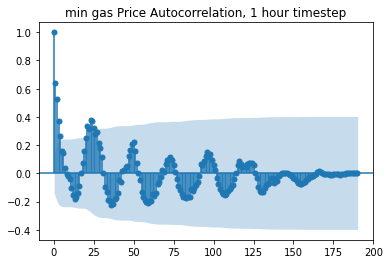

In [181]:
plt.figure(figsize=(5, 5))
plot_acf(df_week['min_gas_price'], lags = 190)
plt.title('min gas Price Autocorrelation, 1 hour timestep')

Text(0.5, 1.0, 'avg gas Price Partial Autocorrelation, 3min timestep')

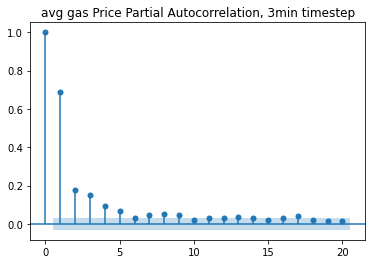

In [204]:
plot_pacf(df_week['avg_gas_price'], lags = 20)
plt.title('avg gas Price Partial Autocorrelation, 3min timestep')